In [42]:
import pandas as pd
df =  pd.read_csv("loan_approval_dataset.csv",skipinitialspace=True)

In [43]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [45]:
df["loan_status"]

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [46]:
df["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [47]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [48]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [49]:
# onehot encoding

df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df2

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [50]:
x = df2.drop(['loan_status_Rejected','loan_id'], axis='columns')
y = df2[['loan_status_Rejected']]

In [51]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [52]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
std_scaler = StandardScaler()
x_transformed = std_scaler.fit_transform(x)

In [55]:
x_transformed.shape, x.shape

((4269, 11), (4269, 11))

In [56]:
# train test split

from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20)


In [58]:
from tensorflow.keras.models import Sequential

In [59]:
from tensorflow.keras.layers import Dense

In [60]:
x_train.shape

(3415, 11)

In [61]:
# ANN(Artificial Neural Network Defining
ANN_model = Sequential()
ANN_model.add(Dense(units=64,activation='relu',input_dim=11))  # hidden layer 1st with input layer
ANN_model.add(Dense(units=32,activation='relu'))  # HIDDEN LAYER 2
ANN_model.add(Dense(units=16,activation='relu'))   # HIDDEN LAYER 3

ANN_model.add(Dense(units=1,activation='sigmoid'))  # OUTPUT LAYER
ANN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ANN_model.summary()

C:\Users\lalch\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = ANN_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7191 - loss: 0.5708 - val_accuracy: 0.9215 - val_loss: 0.2405
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9181 - loss: 0.2263 - val_accuracy: 0.9321 - val_loss: 0.1923
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9241 - loss: 0.1935 - val_accuracy: 0.9251 - val_loss: 0.1745
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9458 - loss: 0.1609 - val_accuracy: 0.9379 - val_loss: 0.1550
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9399 - loss: 0.1531 - val_accuracy: 0.9356 - val_loss: 0.1436
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9516 - loss: 0.1383 - val_accuracy: 0.9333 - val_loss: 0.1387
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9490 - loss: 0.1369 - val_accuracy: 0.9426 - val_loss: 0.1260
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9630 - loss: 0.1078 - val_accuracy: 0

In [63]:
pd.DataFrame(x_train,columns=x.columns).head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,1.475067,-0.306118,-0.656188,0.192617,1.566404,-0.657035,-0.586347,-0.310491,0.222570,-0.995559,-1.007288
1,-0.883825,-1.303798,-1.330795,1.594031,-1.252455,-1.118369,-0.859792,-1.200338,-0.977503,-0.995559,-1.007288
2,0.885344,1.475453,1.146450,-0.157737,1.740407,0.296389,1.259406,1.348359,2.407316,1.004461,0.992765
3,0.885344,-0.413012,-0.412887,1.594031,1.549003,-0.564768,-0.882579,-0.167676,-0.546707,-0.995559,-1.007288
4,-0.294102,0.370879,0.936327,-1.559151,-0.718844,-0.441746,-0.472412,0.810057,-0.362081,-0.995559,-1.007288


In [64]:
pd.DataFrame(x_train,columns=x.columns).isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_Not Graduate      0
self_employed_Yes           0
dtype: int64

In [65]:
x_train.shape , y_train.shape

((3415, 11), (3415, 1))

In [66]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.822255,0.437201,0.921546,0.240452
1,0.921816,0.212022,0.932084,0.192306
2,0.930600,0.182628,0.925059,0.174454
3,0.937335,0.168164,0.937939,0.154981
4,0.941142,0.152267,0.935597,0.143618
5,0.951098,0.138240,0.933255,0.138712
6,0.949927,0.132339,0.942623,0.126030
7,0.959004,0.117767,0.948478,0.124026
8,0.960176,0.110166,0.950820,0.115638
9,0.962811,0.101329,0.949649,0.112675


In [67]:
# Prediction

prediction = ANN_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [68]:
prediction

array([[9.96899545e-01],
       [9.91968751e-01],
       [6.52990309e-07],
       [2.57760519e-04],
       [4.91285318e-05],
       [2.47856893e-04],
       [1.92242232e-03],
       [5.04157288e-05],
       [7.54865934e-04],
       [6.25564600e-04],
       [9.99991357e-01],
       [6.36779063e-04],
       [8.55274677e-01],
       [9.98902142e-01],
       [7.58746028e-01],
       [9.88773584e-01],
       [7.14785326e-03],
       [1.83392713e-05],
       [9.91110027e-01],
       [2.71196246e-01],
       [1.74557645e-04],
       [9.81681406e-01],
       [1.46588183e-03],
       [9.99796569e-01],
       [9.99998689e-01],
       [7.93561697e-01],
       [5.84831905e-05],
       [9.95156355e-03],
       [4.73951817e-01],
       [9.94417548e-01],
       [2.14176416e-05],
       [6.23254338e-03],
       [1.36889308e-03],
       [8.74433577e-01],
       [4.48805913e-05],
       [9.99986708e-01],
       [6.17248081e-02],
       [9.99998271e-01],
       [1.80987754e-05],
       [5.92292666e-01],


In [69]:
prediction>0.5

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [70]:
(prediction>0.5).astype(int)   # in 1D

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [71]:
pred = (prediction>0.5).astype(int).ravel()

In [72]:
y_test['prediction'] = pred 

In [73]:
y_test

,loan_status_Rejected,prediction
1723,1,1
3427,1,1
97,0,0
1312,0,0
1248,0,0
...,...,...
347,0,0
3796,1,0
3695,0,0
1357,1,1


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
matrix = confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])
matrix

array([[513,  17],
       [ 26, 298]], dtype=int64)

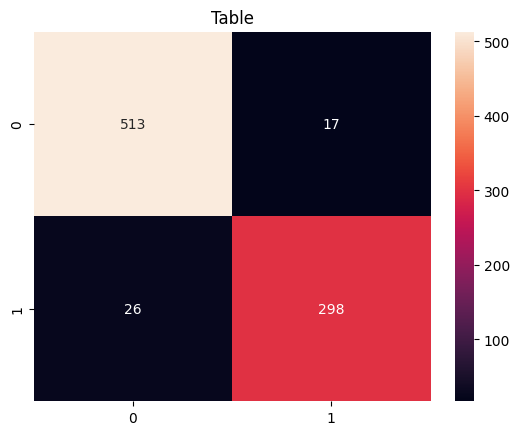

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.heatmap(matrix,annot=True,fmt='d')
plt.title("Table")
plt.show()

In [81]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       530
           1       0.95      0.92      0.93       324

    accuracy                           0.95       854
   macro avg       0.95      0.94      0.95       854
weighted avg       0.95      0.95      0.95       854



In [85]:
#  model save

import os ,joblib
os.makedirs('models',exist_ok=True)
ANN_model.save('./models/loan_approval.h5')
joblib.dump(std_scaler,'./models/std_scaler.lb')

['./models/std_scaler.lb']

In [84]:
std_scaler

StandardScaler()

In [86]:
from tensorflow.keras.models import load_model

In [87]:
ann_model_loaded = load_model('./models/loan_approval.h5')

In [88]:
ann_model_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,395 (13.27 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)